In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dft = pd.read_csv("Train.csv")
dftest = pd.read_csv("Test.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
dft.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
dft.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Taking care of missing values

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(dft)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Outlet_Size,2410,28.3
Item_Weight,1463,17.2


In [9]:
missing_values_table(dftest)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Outlet_Size,1606,28.3
Item_Weight,976,17.2


In [10]:
from missingno import bar

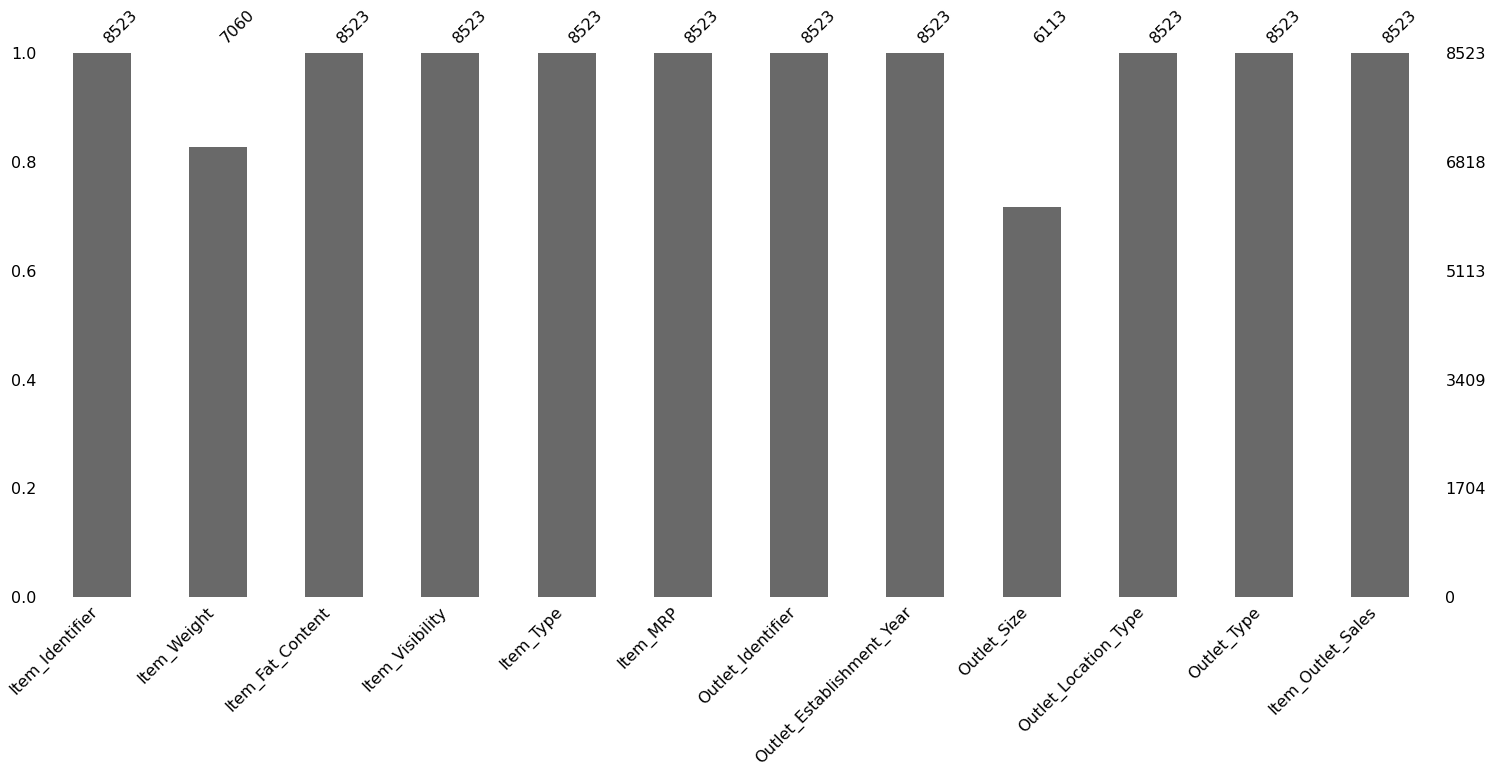

In [11]:
msno = bar(dft)

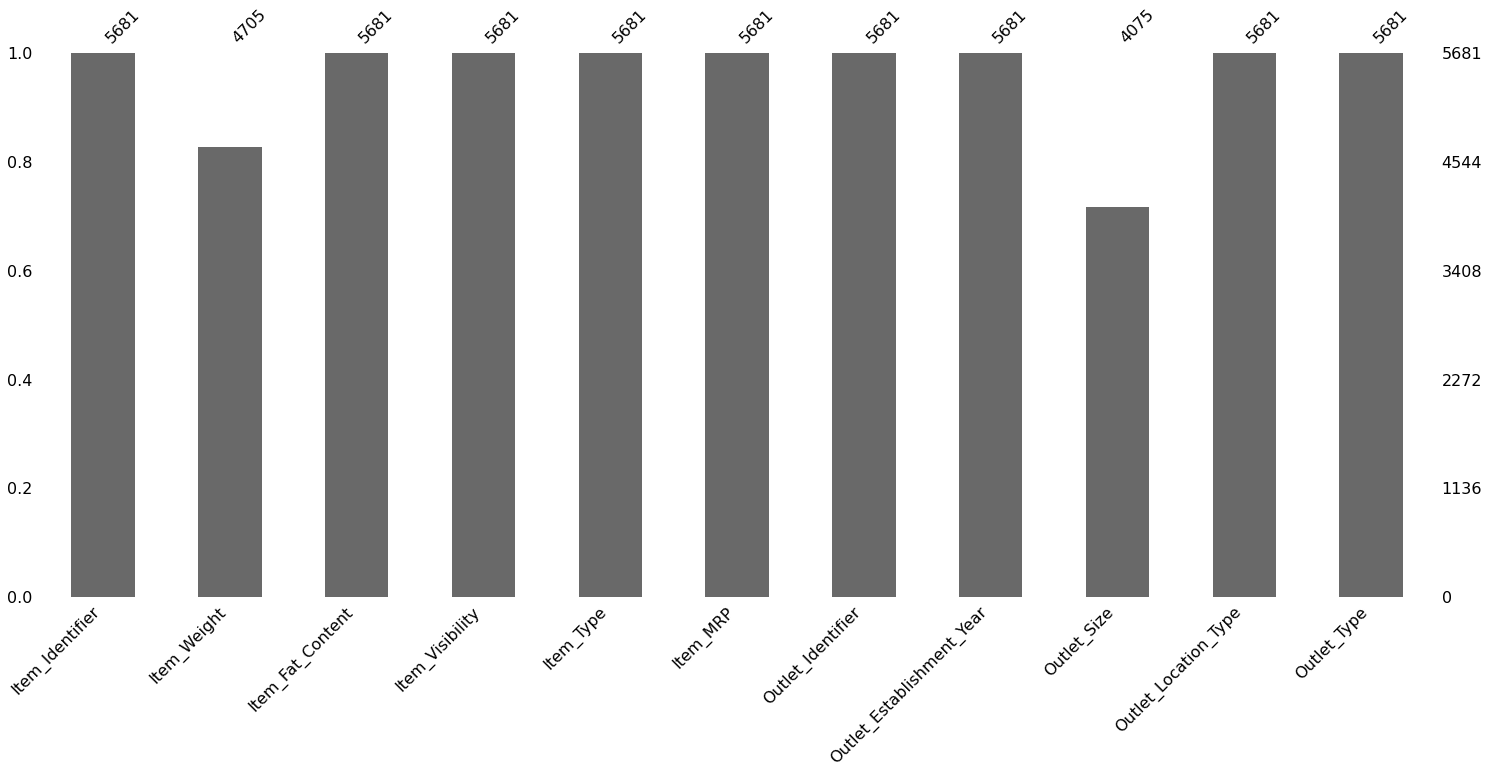

In [12]:
msno = bar(dftest)

In [13]:
dft['Item_Weight'].fillna((dft['Item_Weight'].mean()), inplace=True)
dftest['Item_Weight'].fillna((dftest['Item_Weight'].mean()), inplace=True)

In [14]:
dft = dft.drop("Outlet_Size",axis=1)
dftest = dftest.drop("Outlet_Size",axis=1)

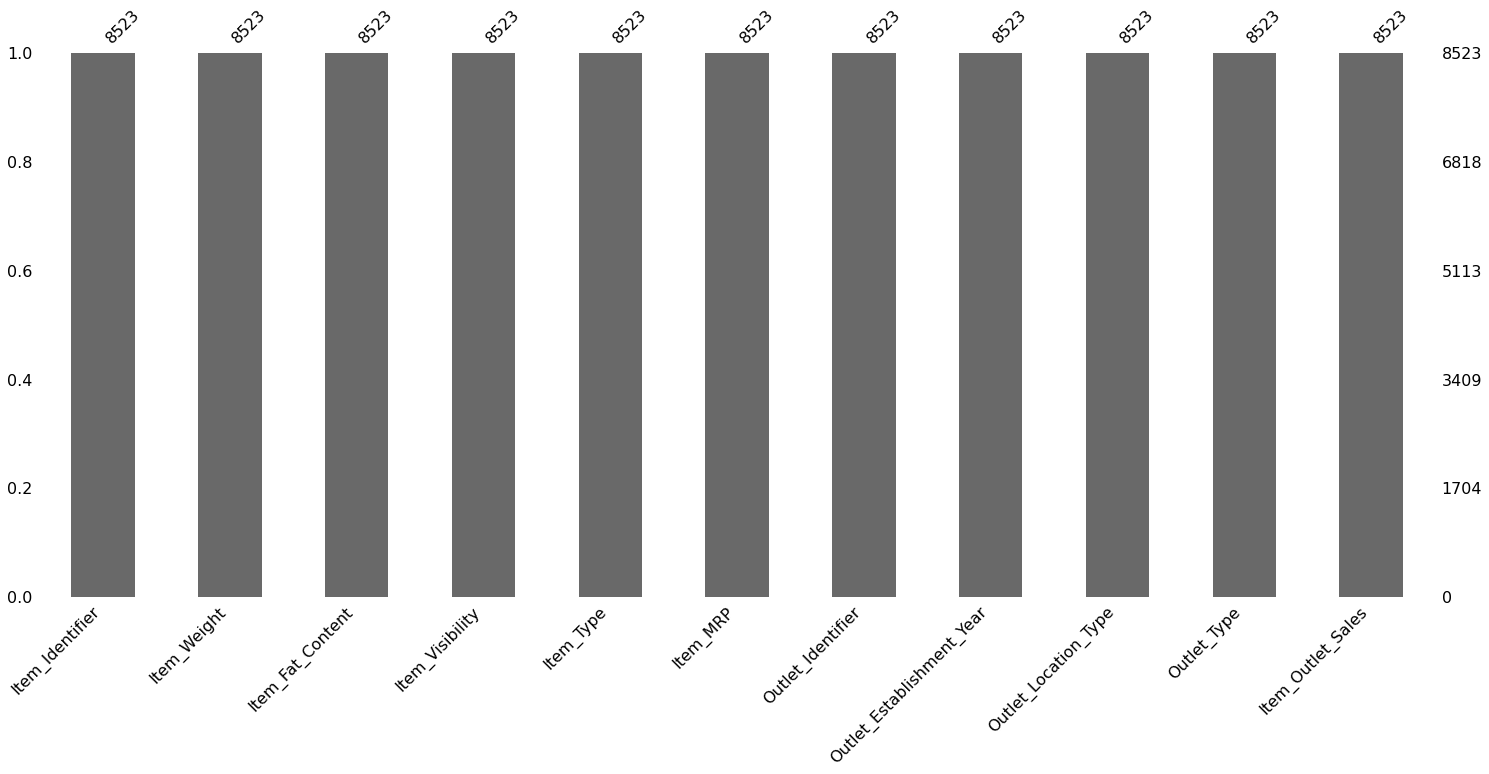

In [15]:
msno = bar(dft)

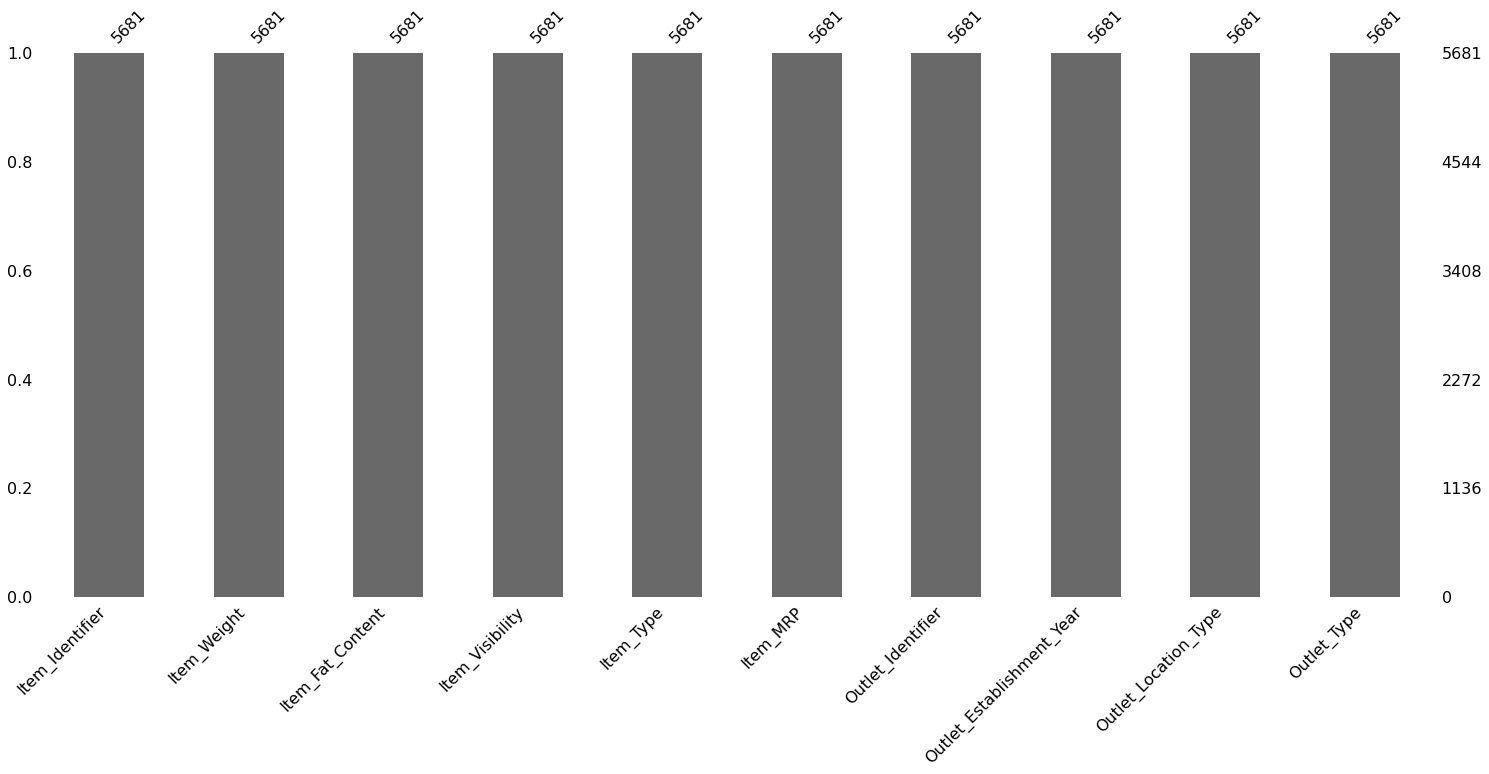

In [16]:
msno = bar(dftest)

In [17]:
Final_ans = dftest.filter(['Item_Identifier','Outlet_Identifier'], axis=1)

In [18]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


## Exploratory Data Analysis

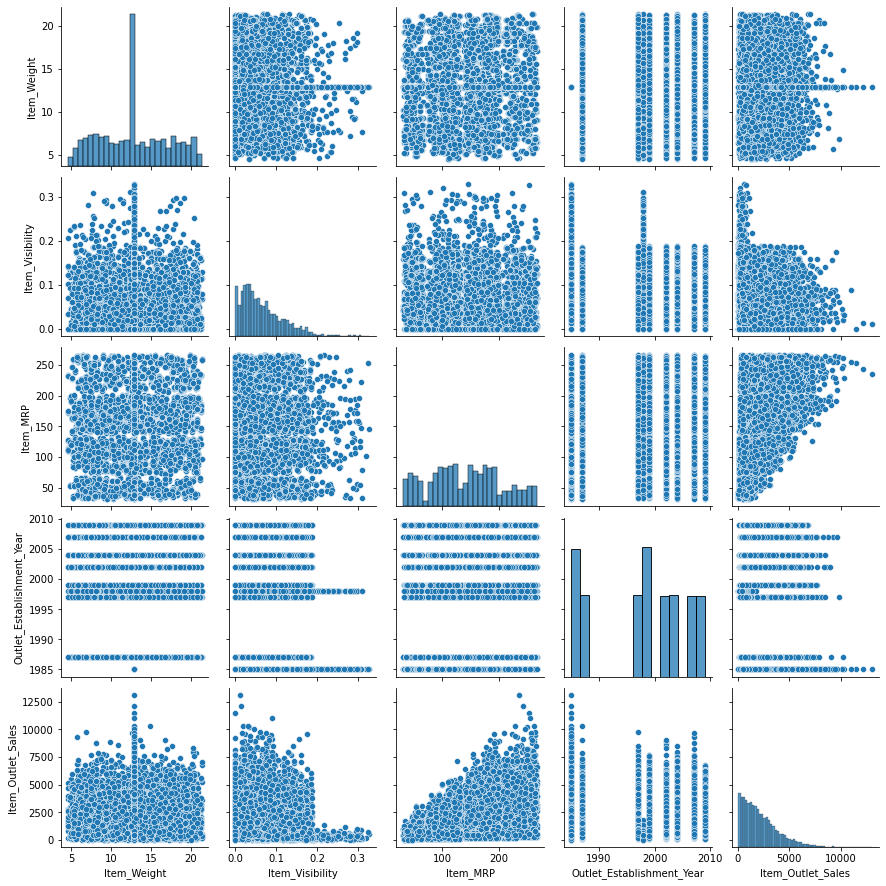

In [19]:
sns.pairplot(data=dft)

<AxesSubplot:>

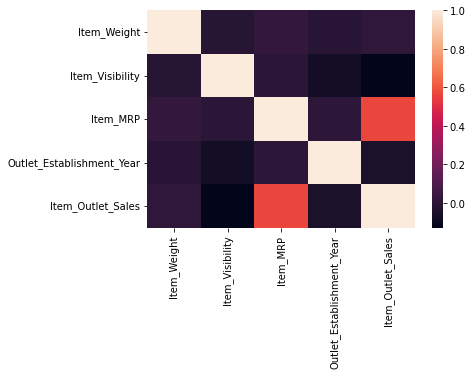

In [20]:
sns.heatmap(dft.corr())

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

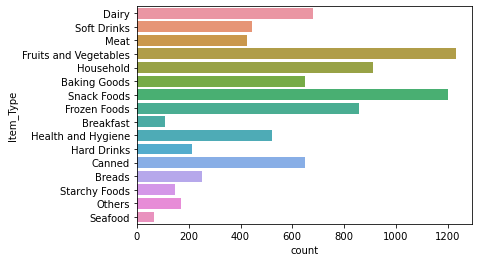

In [21]:
sns.countplot(y ="Item_Type",data = dft)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

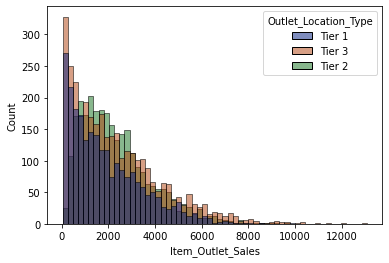

In [22]:
sns.histplot(data=dft,x="Item_Outlet_Sales",hue="Outlet_Location_Type",palette='dark')

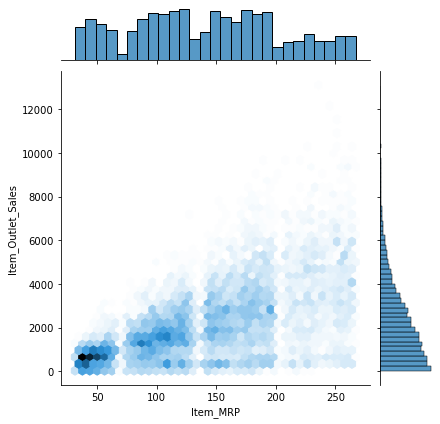

In [23]:
sns.jointplot(data=dft,x="Item_MRP",y="Item_Outlet_Sales",palette='dark',kind='hex')

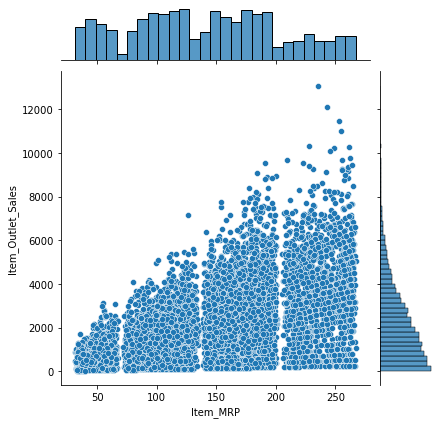

In [24]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=dft)

## Feature Engineering

In [25]:
dft["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
dft = dft.replace(['Low Fat','low fat','LF'],0)
dftest = dftest.replace(['Low Fat','low fat','LF'],0)

In [27]:
dft = dft.replace(['Regular','reg'],1)
dftest = dftest.replace(['Regular','reg'],1)

In [28]:
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [29]:
dft["Item_Fat_Content"].unique()

array([0, 1], dtype=int64)

In [30]:
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [31]:
dftest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,Tier 1,Supermarket Type1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,Tier 2,Supermarket Type1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,Tier 3,Grocery Store
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,Tier 2,Supermarket Type1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,Tier 3,Supermarket Type3


In [32]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 732.6+ KB


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
enc=OneHotEncoder(sparse=False)
bbc=OneHotEncoder(sparse=False)

In [35]:
train_X_encoded = pd.DataFrame(enc.fit_transform(dft[['Outlet_Type']]))
test_X_encoded = pd.DataFrame(enc.fit_transform(dftest[['Outlet_Type']]))

etrain = pd.DataFrame(bbc.fit_transform(dft[['Item_Type']]))
etest = pd.DataFrame(bbc.fit_transform(dftest[['Item_Type']]))

In [36]:
train_X_encoded.columns = enc.get_feature_names(['Outlet_Type'])
test_X_encoded.columns = enc.get_feature_names(['Outlet_Type'])

etrain.columns = bbc.get_feature_names(['Item_Type'])
etest.columns = bbc.get_feature_names(['Item_Type'])

In [37]:
dft.drop(['Outlet_Type'] ,axis=1, inplace=True)
dftest.drop(['Outlet_Type'] ,axis=1, inplace=True)

dft.drop(['Item_Type'] ,axis=1, inplace=True)
dftest.drop(['Item_Type'] ,axis=1, inplace=True)

In [38]:
dft= pd.concat([dft, train_X_encoded ], axis=1)
dftest= pd.concat([dftest, test_X_encoded ], axis=1)

dft= pd.concat([dft, etrain ], axis=1)
dftest= pd.concat([dftest, etest ], axis=1)

In [39]:
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,Tier 1,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009,Tier 3,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999,Tier 1,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1998,Tier 3,732.3800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,1987,Tier 3,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
dftest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1999,Tier 1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,FDW14,8.300000,1,0.038428,87.3198,OUT017,2007,Tier 2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCN55,14.600000,0,0.099575,241.7538,OUT010,1998,Tier 3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,2007,Tier 2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,FDY38,12.695633,1,0.118599,234.2300,OUT027,1985,Tier 3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
dft.drop(['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'], axis = 1,inplace=True)

In [42]:
dftest.drop(['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'], axis = 1,inplace=True)

In [43]:
X=dft.drop("Item_Outlet_Sales",axis=1)
y=dft["Item_Outlet_Sales"]

In [44]:
encoder = OneHotEncoder(handle_unknown='ignore')                                      #

In [45]:
encoder_df = pd.DataFrame(encoder.fit_transform(dft[['Outlet_Location_Type']]).toarray())
encoder_dftest = pd.DataFrame(encoder.fit_transform(dftest[['Outlet_Location_Type']]).toarray())

In [46]:
dft = dft.join(encoder_df)
dftest = dftest.join(encoder_dftest)

In [47]:
dft.drop("Outlet_Location_Type",axis=1,inplace=True)

In [48]:
dftest.drop("Outlet_Location_Type",axis=1,inplace=True)

In [49]:
#view final df
dft.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,0,1,2
0,9.30,0,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,1,0.019278,48.2692,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,17.50,0,0.016760,141.6180,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,1,0.000000,182.0950,732.3800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.93,0,0.000000,53.8614,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
dftest.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,0,1,2
0,20.750000,0,0.007565,107.8622,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,8.300000,1,0.038428,87.3198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.600000,0,0.099575,241.7538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.315000,0,0.015388,155.0340,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,12.695633,1,0.118599,234.2300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
dft.rename(columns = {0:'Tier 1', 1:'Tier 2',2:'Tier 3'}, inplace = True)


In [52]:
dftest.rename(columns = {0:'Tier 1', 1:'Tier 2',2:'Tier 3'}, inplace = True)


In [53]:
dft.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Tier 1,Tier 2,Tier 3
0,9.30,0,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,1,0.019278,48.2692,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,17.50,0,0.016760,141.6180,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,1,0.000000,182.0950,732.3800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.93,0,0.000000,53.8614,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
X=dft.drop("Item_Outlet_Sales",axis=1)
y=dft["Item_Outlet_Sales"]

# Training the Model

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
lr_pred=lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

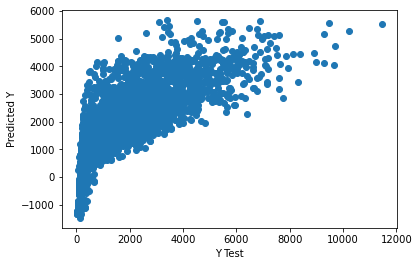

In [61]:
plt.scatter(y_test,lr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 811.8729843782125
MSE: 1213732.3555585823
RMSE: 1101.6952189959718


In [63]:
cdf = pd.DataFrame(lr.coef_,[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP',"Outlet_Type_Grocery Store","Outlet_Type_Supermarket Type1","Outlet_Type_Supermarket Type2","Outlet_Type_Supermarket Type3","Item_Type_Baking Goods","Item_Type_Breads","Item_Type_Breakfast","Item_Type_Canned","Item_Type_Dairy","Item_Type_Frozen Foods","Item_Type_Fruits and Vegetables","Item_Type_Hard Drinks","Item_Type_Health and Hygiene","Item_Type_Household","Item_Type_Meat","Item_Type_Others","Item_Type_Seafood","Item_Type_Snack Foods","Item_Type_Soft Drinks","Item_Type_Starchy Foods",'Tier 1',"Tier 2","Tier 3"]],columns = ["coef"])

In [64]:
cdf

,coef
Item_Weight,-1.461623
Item_Fat_Content,77.025619
Item_Visibility,-515.104014
Item_MRP,15.807042
Outlet_Type_Grocery Store,-1738.613988
Outlet_Type_Supermarket Type1,236.422777
Outlet_Type_Supermarket Type2,-97.323066
Outlet_Type_Supermarket Type3,1599.514276
Item_Type_Baking Goods,-19.975053
Item_Type_Breads,-38.661362


In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=200)

In [67]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [68]:
dt_pred = dt.predict(X_test)

Text(0, 0.5, 'Predicted Y')

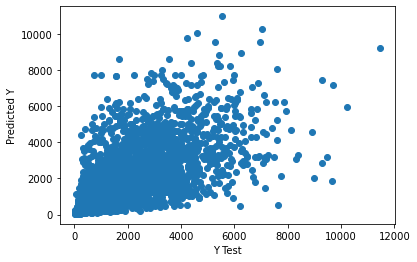

In [69]:
plt.scatter(y_test,dt_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

MAE: 1051.7004921392256
MSE: 2277099.382568746
RMSE: 1509.00609096476


In [71]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [72]:
rd_pred = rf.predict(X_test)

Text(0, 0.5, 'Predicted Y')

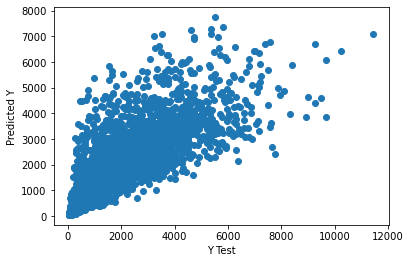

In [73]:
plt.scatter(y_test,rd_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, rd_pred))
print('MSE:', metrics.mean_squared_error(y_test, rd_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rd_pred)))

MAE: 787.2921323081736
MSE: 1285205.8690263475
RMSE: 1133.6692061736296


# Predicting Sales for Test.csv

In [75]:
Final_ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
dtypes: object(2)
memory usage: 88.9+ KB


In [76]:
Final_ans.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [77]:
ff = lr.predict(dftest)
kk = dt.predict(dftest)
ll = rf.predict(dftest)

In [78]:
ff = pd.DataFrame(ff)
kk = pd.DataFrame(kk)
ll = pd.DataFrame(ll)

In [79]:
Final_ans=pd.concat([Final_ans,ff], axis=1)

In [80]:
Final_ans=Final_ans.rename(columns= {0:"Sales(Linear Reg)"})

In [81]:
Final_ans=pd.concat([Final_ans,kk], axis=1)

In [82]:
Final_ans=Final_ans.rename(columns= {0:"Sales(Decision Trees)"})

In [83]:
Final_ans=pd.concat([Final_ans,ll], axis=1)

In [84]:
Final_ans=Final_ans.rename(columns= {0:"Sales(Random Forest)"})

In [85]:
Final_ans.head()

,Item_Identifier,Outlet_Identifier,Sales(Linear Reg),Sales(Decision Trees),Sales(Random Forest)
0,FDW58,OUT049,1776.825484,1693.7952,1567.696009
1,FDW14,OUT017,1430.899256,515.3292,1162.436865
2,NCN55,OUT010,1895.628671,769.6648,543.019822
3,FDQ58,OUT017,2531.437359,612.5360,2048.882985
4,FDY38,OUT027,5089.021190,4452.8704,6011.814468


In [86]:
Final_ans["Item_Outlet_Sales"] = (Final_ans["Sales(Linear Reg)"]*0.4) + (Final_ans["Sales(Decision Trees)"]*0.2) + (Final_ans["Sales(Random Forest)"]*0.4)

In [87]:
Final_ans.head()

,Item_Identifier,Outlet_Identifier,Sales(Linear Reg),Sales(Decision Trees),Sales(Random Forest),Item_Outlet_Sales
0,FDW58,OUT049,1776.825484,1693.7952,1567.696009,1676.567637
1,FDW14,OUT017,1430.899256,515.3292,1162.436865,1140.400288
2,NCN55,OUT010,1895.628671,769.6648,543.019822,1129.392357
3,FDQ58,OUT017,2531.437359,612.5360,2048.882985,1954.635337
4,FDY38,OUT027,5089.021190,4452.8704,6011.814468,5330.908343


In [88]:
dft.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Tier 1,Tier 2,Tier 3
0,9.30,0,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,1,0.019278,48.2692,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,17.50,0,0.016760,141.6180,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,1,0.000000,182.0950,732.3800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.93,0,0.000000,53.8614,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
import pickle

In [90]:
pickle.dump(lr, open('Lin_reg', 'wb'))
pickle.dump(dt, open('Dec_trees', 'wb'))
pickle.dump(rf, open('Ran_for', 'wb'))

In [91]:
import session_info

In [92]:
session_info.show()

In [105]:
pipreqs "C:/Users/Deep/Proj1/Using OHE on item type" 


SyntaxError: invalid syntax (Temp/ipykernel_27528/4155693495.py, line 1)